In [2]:
from halotools.sim_manager import CachedHaloCatalog, FakeSim
import numpy as np 
import numexpr as ne
import scipy
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import random
from astropy.io import ascii
from helpers.io_utils import hlist2pandas
from numpy.linalg import norm

In [14]:
def get_angles(v1,v2):
    angles = np.zeros(np.shape(v1)[0])
    for i in range(len(v1)):
        c = np.dot(v1[i],v2)/norm(v1[i])/norm(v2) # -> cosine of the angle
        angle = np.arccos(np.clip(c, -1, 1))
        angles[i] = angle
    return angles

In [4]:
halo = 'Halo023'
data = hlist2pandas('/Users/lmezini/proj_2/Halos_Recalculated/{}/out_0.list'.format(halo))

In [5]:
host_id = int(data.iloc[data['Mvir'].idxmax()]['ID'])
hjx = data.iloc[data['Mvir'].idxmax()]['JX']
hjy = data.iloc[data['Mvir'].idxmax()]['JY']
hjz = data.iloc[data['Mvir'].idxmax()]['JZ']

x = data.iloc[data['Mvir'].idxmax()]['X']
y = data.iloc[data['Mvir'].idxmax()]['Y']
z = data.iloc[data['Mvir'].idxmax()]['Z']

In [15]:
pos = np.array(list(zip((data['X']-x),(data['Y']-y),(data['Z']-z))))
vel = np.array(list(zip(data['VX'],data['VY'],data['VZ'])))
ang_mom = np.array([hjx,hjy,hjz])
ang_vel = np.divide(vel,pos)

/anaconda3/envs/haloenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


/anaconda3/envs/haloenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/envs/haloenv/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/haloenv/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


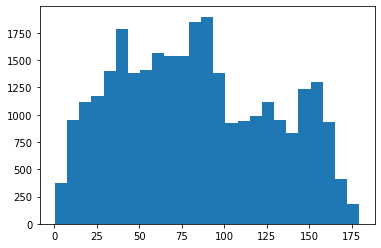

In [18]:
plt.hist(get_angles(ang_vel,ang_mom)*(180./np.pi),bins=25)
plt.show()

In [ ]:
###Generate fake angular momentum data

In [11]:
#let mass = 1.0
particle_mass = 1.0# 281981.0
m = 1e3
rvir = 1e3
G = 4.302*(10**-9.)

In [5]:
#generate array of angular momenta for individual 100 particles
l = np.random.normal(loc=2.0,size=100)
print("tot L mag: {}".format(sum(np.sqrt(l*l))))

tot L mag: 198.6570925857385


In [6]:
#To create x,y,z components, split up x^2, y^2, and z^2 are fractions of 1
xyz = [np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1)]
xyz = xyz/np.sum(xyz)

In [7]:
#using fractions, calculate x, y, z
lx = np.sqrt(l**2*xyz[0])
ly = np.sqrt(l**2*xyz[1])
lz = np.sqrt(l**2*xyz[2])

#check if it works
print(round(lx[0]**2+ly[0]**2+lz[0]**2,4)==round(l[0]**2,4))
l_arr = np.array(list(zip(lx,ly,lz)))


True


In [8]:
##use the fact that r dot l = 0 to find r components
#pick random values for rx, ry and solve for rz using identity
x = np.random.uniform(size=100)*l
y = np.random.uniform(size=100)*l
z = -(x*lx+y*ly)/lz

r = np.array(list(zip(x,y,z)))


In [9]:
## create velocity array that is perpendicular using the fact that l x r = v
vel = np.cross(l_arr,r)


In [14]:
L = calc_ang_momentum(r,vel,m)
print(L)

[ 840829.63104183 1146033.00291956 1256338.21096157]


In [13]:
L/np.linalg.norm(L),l_arr.sum(axis=0)/np.linalg.norm(l_arr.sum(axis=0))

(array([0.44323174, 0.60411549, 0.66226136]),
 array([0.44323174, 0.60411549, 0.66226136]))

In [587]:
S = calc_spin_bullock(L/np.linalg.norm(L),mvir,rvir)
S_orig = calc_spin_bullock(l_arr.sum(axis=0)/np.linalg.norm(l_arr.sum(axis=0)),mvir,rvir)

In [588]:
S,S_orig

(0.3409178957205109, 0.34091789572051084)